In [1]:
import numpy as np
import time
from grid_world import standard_grid,negative_grid
import matplotlib.pyplot as plt
SMALL_TOL=10e-10
ALL_Actions=['U','D','L','R',]
GAMMA=0.9
LEARNING_RATE = 0.001
def print_values(V, g):
  print("Values:")
  for i in range(g.width):
    print("---------------------------")
    for j in range(g.height):
      v = V.get((i,j), 0)
      if v >= 0:
        print(" %.2f|" % v, end="")
      else:
        print("%.2f|" % v, end="") # -ve sign takes up an extra space
    print("")


def print_policy(P, g):
  print("Policy:")
  for i in range(g.width):
    print("---------------------------")
    for j in range(g.height):
      a = P.get((i,j), ' ')
      print("  %s  |" % a, end="")
    print("")
    

In [2]:
def play_game(grid,policy):
    start_states=list(grid.actions.keys())
    start_idx=np.random.choice(len(start_states))
    grid.set_state(start_states[start_idx])
    s=grid.current_state()
    states_and_rewards=[(s,0)] # current state with no reward
    while not grid.game_over():
        a=policy[s]
        a = random_action(a)
        r=grid.move(a)
        s=grid.current_state()
        states_and_rewards.append((s,r))
    G=0 # termincal state with value = 0
    states_and_returns=[]
    first=True
    for s, r in reversed(states_and_rewards):
        if first:
            first=False
        else:
            states_and_returns.append((s,G))
        G=r+GAMMA*G
    states_and_returns.reverse()
    return states_and_returns

def random_action(a):
    # choose given a with probability 0.5
    # choose some other a' != a with probability 0.5/3
    p = np.random.random()
    if p < 0.5:
        return a
    else:
        tmp = list(ALL_Actions)
        tmp.remove(a)
        return np.random.choice(tmp)

In [3]:
grid=standard_grid()
print("rewards:")
print_values(grid.rewards,grid)

rewards:
Values:
---------------------------
 0.00| 0.00| 0.00| 1.00|
---------------------------
 0.00| 0.00| 0.00|-1.00|
---------------------------
 0.00| 0.00| 0.00| 0.00|


In [4]:
# state -> action
policy = {
(2, 0): 'U',
(1, 0): 'U',
(0, 0): 'R',
(0, 1): 'R',
(0, 2): 'R',
(1, 2): 'U',
(2, 1): 'L',
(2, 2): 'U',
(2, 3): 'L',
}

In [5]:
# Main starts here

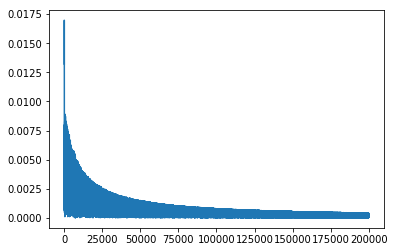

Values:
---------------------------
 0.42| 0.55| 0.69| 0.00|
---------------------------
 0.34| 0.00| 0.35| 0.00|
---------------------------
 0.27| 0.14| 0.01|-0.13|
Policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  L  |  U  |  L  |


In [6]:
theta=np.random.randn(4)/2
def s2x(s):
    return np.array([s[0]-1,s[1]-1.5,s[0]*s[1]-3,1])
deltas=[]
t=1.0
for it in range(200000+1):
    if it %100==0:
        print(it,end='\r')
        t+=0.01
    alpha=LEARNING_RATE/t
    biggest_change=0
    states_and_returns=play_game(grid,policy)
    seen_states=set()
    for s, G in states_and_returns:
        if s not in seen_states:
            old_theta=theta.copy()
            x=s2x(s)
            V_hat=theta.dot(x)
            # d(V_hat)/d(theta)=x 
            theta+=alpha*(G-V_hat)*x
            biggest_change=max(biggest_change,np.abs(old_theta-theta).sum())
            seen_states.add(s)
    deltas.append(biggest_change)
# check results
plt.plot(deltas)
plt.show()
# obtain predicted values
V = {}
states = grid.all_states()
for s in states:
    if s in grid.actions:
        V[s] = theta.dot(s2x(s))
    else:
      # terminal state or state we can't otherwise get to
        V[s] = 0

print_values(V, grid)
print_policy(policy, grid)

In [8]:
theta

array([-0.07580052,  0.13435532, -0.13044959,  0.14252559])